<a href="https://colab.research.google.com/github/dacardonave/AnaliticaDatos/blob/master/6_NN_DeepLearning/NN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#from tensorflow import keras
print(tf.__version__)

2.2.0


In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255

4423680/4422102 [==============================] - 0s 0us/step


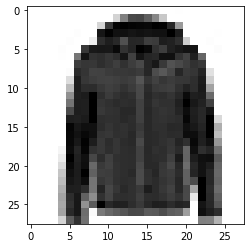

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels))
print(images.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [0]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
red1 (Dense)                 (None, 200)               157000    
_________________________________________________________________
hred2 (Dense)                (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


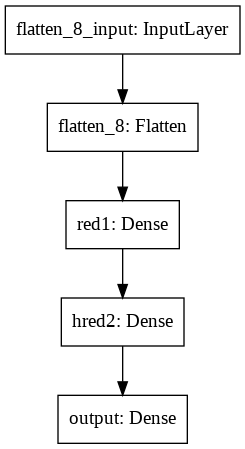

In [65]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary()
tf.keras.utils.plot_model(model)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 200)               157000    
_________________________________________________________________
h2 (Dense)                   (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


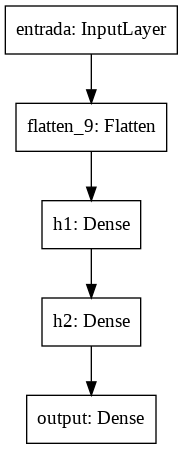

In [66]:
#arquitectura funcional
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)

model_fun = tf.keras.Model(inputs=input_l,outputs=output)
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


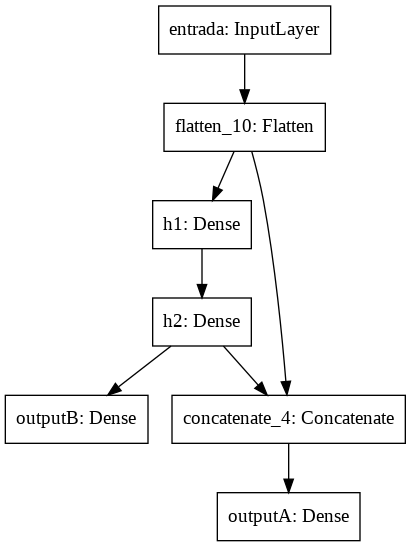

In [67]:
#arquitectura funcional 2 
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
concat = tf.keras.layers.concatenate([h2,flatten])
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [0]:
model.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy


In [69]:
history = model.fit(Xtrain, ytrain , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_data=(Xtest, ytest))

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.4905 - accuracy: 0.8251 - val_loss: 0.4419 - val_accuracy: 0.8388
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3616 - accuracy: 0.8682 - val_loss: 0.3768 - val_accuracy: 0.8682
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3222 - accuracy: 0.8816 - val_loss: 0.3811 - val_accuracy: 0.8577
Epoch 4/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3041 - accuracy: 0.8863 - val_loss: 0.3507 - val_accuracy: 0.8737
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2833 - accuracy: 0.8948 - val_loss: 0.3557 - val_accuracy: 0.8708
Epoch 6/10
938/938 [==============================] - 2s 3ms/step - loss: 0.2700 - accuracy: 0.8994 - val_loss: 0.3469 - val_accuracy: 0.8729
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2587 - accuracy: 0.9027 - val_loss: 0.3478 - val_accuracy: 0.8729
Epoch 

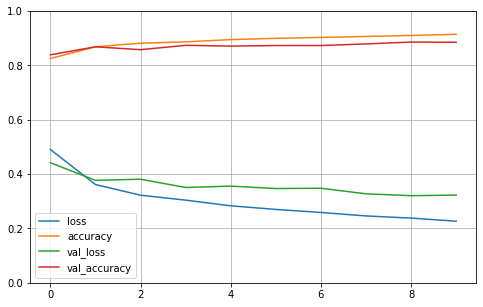

In [70]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [0]:
yest = model.predict(Xtest)

In [72]:
yest[0].argmax()

9

In [73]:
model.layers[1]

In [100]:
k = abs(model.layers[1].get_weights()[0]).sum(axis=1)
k.shape

(784,)

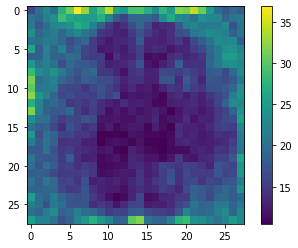

In [74]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [75]:
model.layers[1].get_weights()[1].shape

(200,)

# Ejercicio 
Crear red con dos entradas dos salidas.
* 1 entrada son imagenes limpias 
* 2 entrada son imagenes contaminadas con ruido blanco gaussiano con var = 0.1

Determinar acierto en conjunto de test y relevancia de los tipos de entrada con respecto a los pixeles sobre su primera capa oculta de conexion

In [0]:
import numpy as np
noise = np.random.normal(0,0.1, Xtrain.shape)
xtrain_noise = Xtrain + noise

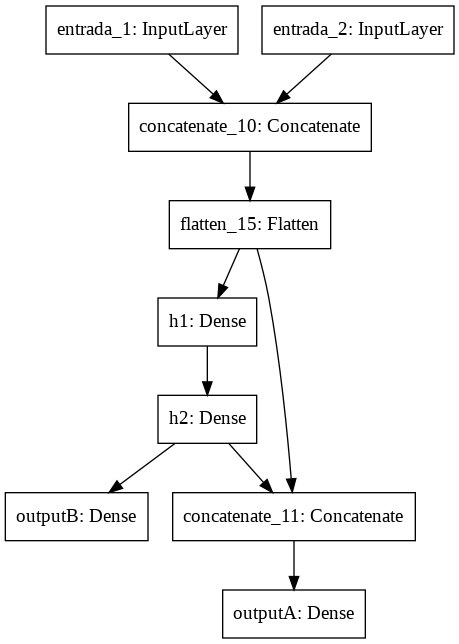

In [110]:
#arquitectura funcional 2 
input_l1 = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada_1')
input_l2 = tf.keras.layers.Input(shape=(xtrain_noise.shape[1],xtrain_noise.shape[2]), name='entrada_2')
concat1 = tf.keras.layers.concatenate([input_l1, input_l2])
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(concat1)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
concat = tf.keras.layers.concatenate([h2,flatten])
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)

model_fun = tf.keras.Model(inputs=[input_l1, input_l2], outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [111]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy

model_fun.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
entrada_1 (InputLayer)          [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
entrada_2 (InputLayer)          [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
concatenate_10 (Concatenate)    (None, 28, 56)       0           entrada_1[0][0]                  
                                                                 entrada_2[0][0]                  
__________________________________________________________________________________________________
flatten_15 (Flatten)            (None, 1568)         0           concatenate_10[0][0]      

In [112]:
history = model_fun.fit((Xtrain, xtrain_noise), ytrain , epochs=15,batch_size=64, # 32, 64, 128, 256
                    validation_data=((Xtest,Xtest), ytest))

Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 1.0038 - outputA_loss: 0.5167 - outputB_loss: 0.4871 - outputA_accuracy: 0.8195 - outputB_accuracy: 0.8252 - val_loss: 0.8525 - val_outputA_loss: 0.4318 - val_outputB_loss: 0.4208 - val_outputA_accuracy: 0.8482 - val_outputB_accuracy: 0.8469
Epoch 2/15
938/938 [==============================] - 4s 4ms/step - loss: 0.7540 - outputA_loss: 0.3826 - outputB_loss: 0.3715 - outputA_accuracy: 0.8621 - outputB_accuracy: 0.8646 - val_loss: 0.7884 - val_outputA_loss: 0.3963 - val_outputB_loss: 0.3920 - val_outputA_accuracy: 0.8590 - val_outputB_accuracy: 0.8602
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.6861 - outputA_loss: 0.3468 - outputB_loss: 0.3393 - outputA_accuracy: 0.8740 - outputB_accuracy: 0.8763 - val_loss: 0.8546 - val_outputA_loss: 0.4235 - val_outputB_loss: 0.4311 - val_outputA_accuracy: 0.8484 - val_outputB_accuracy: 0.8406
Epoch 4/15
938/938 [==============================] 

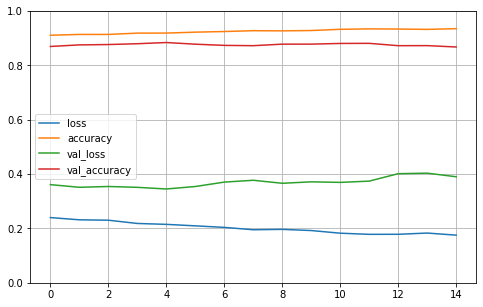

In [82]:
 pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [86]:
model_fun.layers[4]

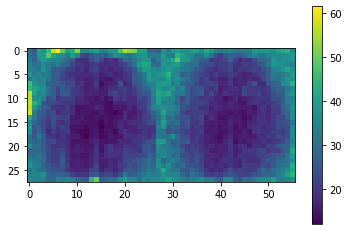

In [106]:
plt.imshow(abs(model_fun.layers[4].get_weights()[0]).sum(axis=1).reshape(28,56))
plt.colorbar()
plt.show()